# Analisis Data Games Sales by RevoU



*   Nama    : Hafidz Muhammad Fahri
*   Email   : hafidzp4g@gmail.com
*   Github  : hafidzmf48
*   Discord : Kuroryu_21#4356



## Business Question



1.   Which games is the oldest and the newest in this dataset?
2.   Which publisher published most of the games?
3.   Which developer develop most of the games?
4.   Which series has the most sales?
5.   Which series has the most games?



## Import Packages and Files

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Path to the file in your Github repo
file_path = "https://raw.githubusercontent.com/hafidzmf48/damc-revou/main/Games%20Sales%20-%20Case%20Study%20-%20Games%20(1).csv"

# Read a CSV file using pandas
data = pd.read_csv(file_path, delimiter=',', encoding='utf-8', header=0)
data.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


## Assesing and Cleaning Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


Detected NULL in Series Column

In [ ]:
data['Series']=data['Series'].fillna('Non Series Game')
data.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Non Series Game,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Non Series Game,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Non Series Game,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# check any duplicate in dataset
data.duplicated().sum()

2

In [ ]:
# Check for duplicated values in each column
duplicated_columns = data.apply(lambda x: x.duplicated().any())

print("Columns with duplicated data:")
print(duplicated_columns[duplicated_columns == True])


Columns with duplicated data:
Name         True
Sales        True
Series       True
Release      True
Genre        True
Developer    True
Publisher    True
dtype: bool


In [ ]:
# Drop duplicated data

data.drop_duplicates(inplace=True)
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
170    False
171    False
172    False
173    False
174    False
Length: 175, dtype: bool

## Exploratory Analysis (EDA)

In [ ]:
data.describe()

,Sales
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000


It only show 'Sales' because it the only one that has numeric type of data

## Answer Business Question

In [ ]:
# answer question 1

data['Release'] = pd.to_datetime(data['Release'])
oldest = data['Release'].min()
newest = data['Release'].max()
print("Oldest Games released at:",oldest)
print("Newest Games released at:", newest)

Oldest Games released at: 1984-12-01 00:00:00
Newest Games released at: 2021-02-01 00:00:00


In [ ]:
oldest_game = data.sort_values(by='Release', ascending=True)
oldest_game.head(1)


,Name,Sales,Series,Release,Genre,Developer,Publisher
133,Hydlide,1.0,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software,Technology and Entertainment Software


In [ ]:
newest_game = data.sort_values(by='Release', ascending=False)
newest_game.head(1)

,Name,Sales,Series,Release,Genre,Developer,Publisher
20,Valheim,6.0,Non Series Game,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing


In [ ]:
# answer question 2

top_p = data['Publisher'].value_counts().idxmax()
top_p_count = data['Publisher'].value_counts().max()
bottom_p = data['Publisher'].value_counts().idxmin()
bottom_p_count = data['Publisher'].value_counts().min()

print(f"Highest publisher counts is: {top_p}, with: {top_p_count}, published games")
print(f"Lowest publisher counts is: {bottom_p}, with: {bottom_p_count}, published games")


Highest publisher counts is: Electronic Arts, with: 19, published games
Lowest publisher counts is: Hasbro Interactive, with: 1, published games


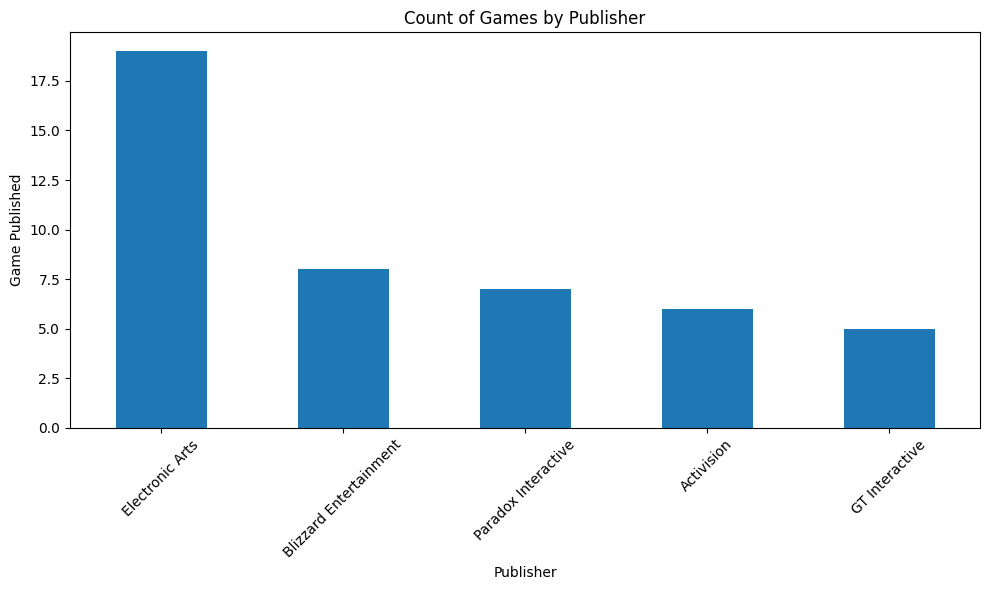

In [ ]:
publishertop = data['Publisher'].value_counts().head(5)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
publishertop.plot(kind='bar')
plt.title('Count of Games by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Game Published')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

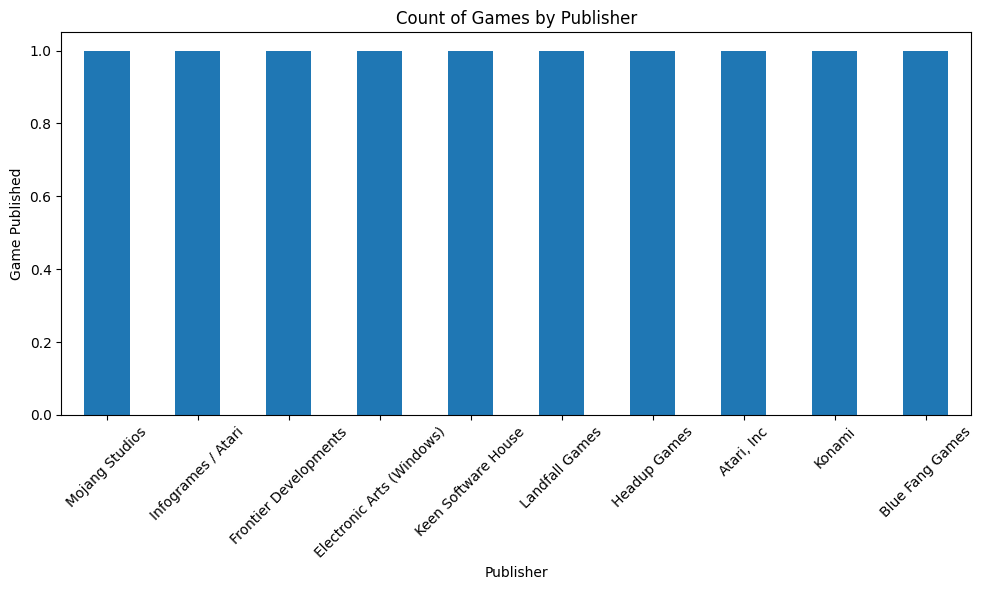

In [ ]:
publisher = data['Publisher'].value_counts().tail(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
publisher.plot(kind='bar')
plt.title('Count of Games by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Game Published')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [ ]:
# answer question 3

top_d = data['Developer'].value_counts().idxmax()
top_d_count = data['Developer'].value_counts().max()
bottom_d = data['Developer'].value_counts().idxmin()
bottom_d_count = data['Developer'].value_counts().min()

print(f"Highest Developer counts is: {top_d}, with: {top_d_count}, published games")
print(f"Lowest Developer counts is: {bottom_d}, with: {bottom_d_count}, published games")


Highest Developer counts is: Blizzard Entertainment, with: 8, published games
Lowest Developer counts is: Team Cherry, with: 1, published games


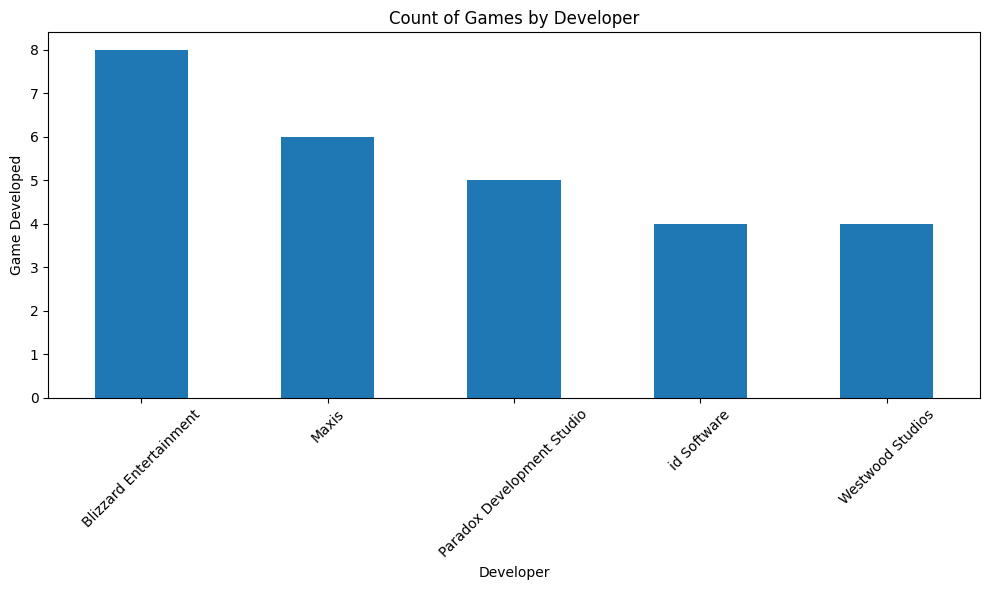

In [ ]:
topdev = data['Developer'].value_counts().head(5)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
topdev.plot(kind='bar')
plt.title('Count of Games by Developer')
plt.xlabel('Developer')
plt.ylabel('Game Developed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

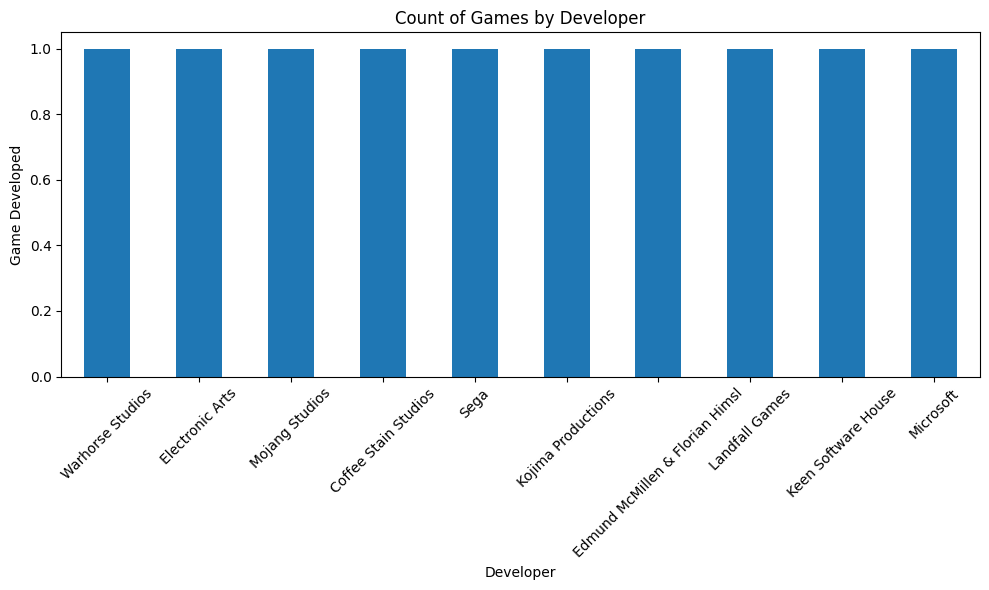

In [ ]:
lowdev = data['Developer'].value_counts().tail(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
lowdev.plot(kind='bar')
plt.title('Count of Games by Developer')
plt.xlabel('Developer')
plt.ylabel('Game Developed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [ ]:
# answer question 4

Most_sales_game = data.sort_values(by='Sales', ascending=False)
Most_sales_game.head(1)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Non Series Game,2017-12-01,Battle royale,PUBG Studios,Krafton


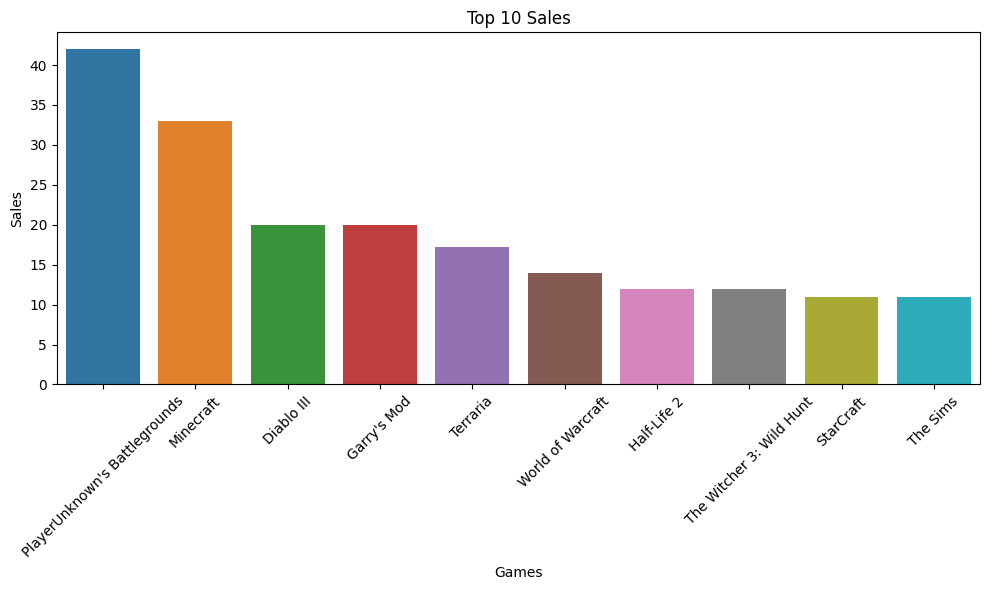

In [ ]:
topsales = Most_sales_game.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(topsales, x=topsales['Name'], y=topsales['Sales'])
plt.title('Top 10 Sales')
plt.xlabel('Games')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [ ]:
# answer question 5

excluded_value = "Non Series Game"

series_counts = data[data['Series'] != excluded_value]['Series'].value_counts()

top_s = series_counts.idxmax()
top_s_count = series_counts.max()
bottom_s = series_counts.idxmin()
bottom_s_count = series_counts.min()

print(f"Series that has the most games is: {top_s}, with: {top_s_count}, published games")
print(f"Series that has the most games is: {bottom_s}, with: {bottom_s_count}, published games")


Series that has the most games is: Command & Conquer, with: 5, published games
Series that has the most games is: Hydlide, with: 1, published games


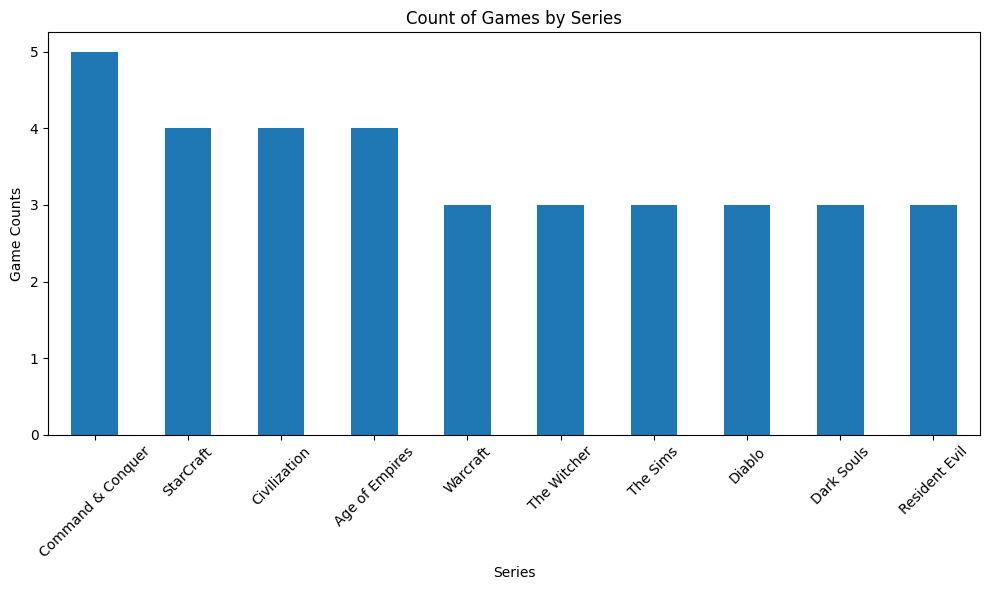

In [ ]:
top_series = series_counts.head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_series.plot(kind='bar')
plt.title('Count of Games by Series')
plt.xlabel('Series')
plt.ylabel('Game Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()